In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import autokeras as ak
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('0005.hk','2019-01-01','2020-01-08')
dataset = data[:-5]
dataset['Prediction']=dataset['Close'].shift(-1)
dataset = dataset.dropna()
dataset = dataset.replace(",", ".", regex=True)
val_split = int(len(dataset) * 0.7)
data_train = dataset[:val_split]
validation_data = dataset[val_split:]

[*********************100%***********************]  1 of 1 completed


<ipython-input-2-727e79bd4d73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Prediction']=dataset['Close'].shift(-1)


In [3]:
data_x = data_train[
    [
        "Open",
        "High",
        "Low",
        "Close"
    ]
].astype("float64")
data_x_val = validation_data[
    [
        "Open",
        "High",
        "Low",
        "Close"
    
    ]
].astype("float64")
data_x_test = dataset[
    [
        "Open",
        "High",
        "Low",
        "Close"
    ]
].astype("float64")
scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
data_x = scaler.fit_transform(data_x)
data_x_val = scaler.transform(data_x_val)
data_x_test = scaler.transform(data_x_test)

In [4]:
data_y = data_train["Prediction"]

data_y_val = validation_data["Prediction"]

print(data_x.shape)  # (863, 5)
print(data_y.shape)  # (863,)

(170, 4)
(170,)


In [5]:
predict_from = 1
predict_until = 5
lookback = 7
clf = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    max_trials=50,
    objective="loss",
)
# Train the TimeSeriesForecaster with train data
clf.fit(
    x=data_x,
    y=data_y,
    validation_data=(data_x_val, data_y_val),
    batch_size=20,
    epochs=200,
)

INFO:tensorflow:Reloading Oracle from existing project ./time_series_forecaster/oracle.json
INFO:tensorflow:Reloading Tuner from ./time_series_forecaster/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/200
9/9 [==============================] - 2s 55ms/step - loss: 2891.3928 - mean_squared_error: 2891.3928 - val_loss: 743.2324 - val_mean_squared_error: 743.2325
Epoch 2/200
9/9 [==============================] - 0s 11ms/step - loss: 552.8325 - mean_squared_error: 552.8325 - val_loss: 72.0970 - val_mean_squared_error: 72.0970
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 102.6138 - mean_squared_error: 102.6138 - val_loss: 2.6480 - val_mean_squared_error: 2.6480
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 28.7499 - mean_squared_error: 28.7499 - val_loss: 4.4121 - val_mean_squared_error: 4.4121
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 15.2504 - mean_squared_error: 15.2504 - val_loss: 9.3989 - val_m

9/9 [==============================] - 0s 8ms/step - loss: 1.2583 - mean_squared_error: 1.2583 - val_loss: 0.6589 - val_mean_squared_error: 0.6589
Epoch 51/200
9/9 [==============================] - 0s 7ms/step - loss: 1.1962 - mean_squared_error: 1.1962 - val_loss: 0.6654 - val_mean_squared_error: 0.6654
Epoch 52/200
9/9 [==============================] - 0s 8ms/step - loss: 1.1424 - mean_squared_error: 1.1424 - val_loss: 0.6731 - val_mean_squared_error: 0.6731
Epoch 53/200
9/9 [==============================] - 0s 8ms/step - loss: 1.0956 - mean_squared_error: 1.0956 - val_loss: 0.6810 - val_mean_squared_error: 0.6810
Epoch 54/200
9/9 [==============================] - 0s 9ms/step - loss: 1.0548 - mean_squared_error: 1.0548 - val_loss: 0.6887 - val_mean_squared_error: 0.6887
Epoch 55/200
9/9 [==============================] - 0s 8ms/step - loss: 1.0193 - mean_squared_error: 1.0193 - val_loss: 0.6958 - val_mean_squared_error: 0.6958
Epoch 56/200
9/9 [==============================] - 0

9/9 [==============================] - 0s 8ms/step - loss: 0.5869 - mean_squared_error: 0.5869 - val_loss: 0.4770 - val_mean_squared_error: 0.4770
Epoch 102/200
9/9 [==============================] - 0s 9ms/step - loss: 0.5830 - mean_squared_error: 0.5830 - val_loss: 0.4715 - val_mean_squared_error: 0.4715
Epoch 103/200
9/9 [==============================] - 0s 8ms/step - loss: 0.5791 - mean_squared_error: 0.5791 - val_loss: 0.4661 - val_mean_squared_error: 0.4661
Epoch 104/200
9/9 [==============================] - 0s 8ms/step - loss: 0.5754 - mean_squared_error: 0.5754 - val_loss: 0.4609 - val_mean_squared_error: 0.4609
Epoch 105/200
9/9 [==============================] - 0s 8ms/step - loss: 0.5718 - mean_squared_error: 0.5718 - val_loss: 0.4557 - val_mean_squared_error: 0.4557
Epoch 106/200
9/9 [==============================] - 0s 8ms/step - loss: 0.5683 - mean_squared_error: 0.5683 - val_loss: 0.4507 - val_mean_squared_error: 0.4507
Epoch 107/200
9/9 [=============================

Epoch 152/200
9/9 [==============================] - 0s 8ms/step - loss: 0.4632 - mean_squared_error: 0.4632 - val_loss: 0.3489 - val_mean_squared_error: 0.3489
Epoch 153/200
9/9 [==============================] - 0s 7ms/step - loss: 0.4616 - mean_squared_error: 0.4616 - val_loss: 0.3497 - val_mean_squared_error: 0.3497
Epoch 154/200
9/9 [==============================] - 0s 8ms/step - loss: 0.4600 - mean_squared_error: 0.4600 - val_loss: 0.3507 - val_mean_squared_error: 0.3507
Epoch 155/200
9/9 [==============================] - 0s 8ms/step - loss: 0.4584 - mean_squared_error: 0.4584 - val_loss: 0.3518 - val_mean_squared_error: 0.3518
Epoch 156/200
9/9 [==============================] - 0s 8ms/step - loss: 0.4568 - mean_squared_error: 0.4568 - val_loss: 0.3531 - val_mean_squared_error: 0.3531
Epoch 157/200
9/9 [==============================] - 0s 8ms/step - loss: 0.4552 - mean_squared_error: 0.4552 - val_loss: 0.3544 - val_mean_squared_error: 0.3544
Epoch 158/200
9/9 [===============

INFO:tensorflow:Assets written to: ./time_series_forecaster/best_model/assets


INFO:tensorflow:Assets written to: ./time_series_forecaster/best_model/assets


In [6]:
# Predict with the best model(includes original training data).
print(data_x_test.shape)
predictions = clf.predict(data_x_test)
print(predictions)
# Evaluate the best model with testing data.
# print(clf.evaluate(data_x_val, data_y_val))

(244, 4)
12/12 [==============================] - 0s 2ms/step
[[60.159798]
 [59.718403]
 [60.013393]
 [59.494854]
 [59.474644]]


[*********************100%***********************]  1 of 1 completed


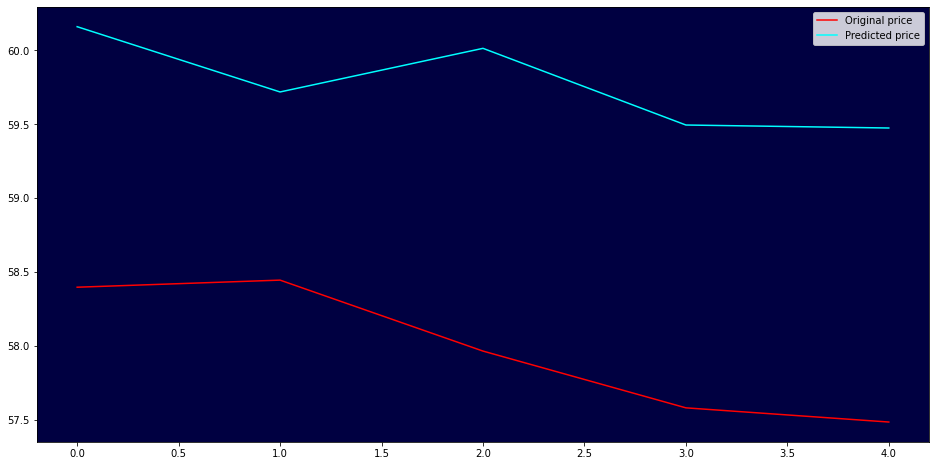

In [7]:
import matplotlib.pyplot as plt
import numpy as np
y_pred = np.array(yf.download('0005.hk','2020-01-02','2020-01-12')["Adj Close"])
# predictions = scaler.inverse_transform(predictions.reshape(-1,1))
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(np.array(data[-5:]["Adj Close"]), color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [8]:
data[-7:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-27,60.799999,60.900002,60.599998,60.849998,58.397945,14441582
2019-12-30,60.799999,61.200001,60.700001,60.900002,58.445934,15500081
2019-12-31,60.849998,61.000000,60.500000,60.849998,58.397945,6998814
2020-01-02,60.849998,60.950001,60.599998,60.900002,58.445934,14629077
2020-01-03,60.900002,61.200001,60.250000,60.400002,57.966084,14419537
2020-01-06,60.099998,60.400002,59.799999,60.000000,57.582199,13809308
2020-01-07,60.200001,60.299999,59.799999,59.900002,57.486237,8818594


In [9]:
# 